### Trying out the new SeasonalForecaster interface

In [1]:
from typing import List, Dict

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorly as tl
from gluonts.dataset.util import to_pandas
from gluonts.dataset.repository.datasets import get_dataset, dataset_recipes
from scipy import interpolate
from scipy.stats import linregress
from scipy.fftpack import rfft, irfft, dct, idct
from tensorly.decomposition import parafac, tucker


from tens_utils import (
    get_gluonts_dataset,
    multifold,
    repeat,
    dct_dft_errors,
    tensor_errors,
    trend_cycle_decompose,
    naive_seasonal_decompose,
    analyze_and_plot,
    plot_comparison,
    mad,
    rmse, get_param_sweep, dct_reconstruct, dft_reconstruct,
)

from forecaster import (
    DCTForecaster, DFTForecaster, HoltWintersForecaster, CPForecaster, TuckerForecaster
)

In [2]:
train_datas, test_datas, lens, freqs = get_gluonts_dataset(dataset_name="electricity")

INFO:root:using dataset already processed in path /Users/caner/.mxnet/gluon-ts/datasets/electricity.


21044    321
dtype: int64
H    321
dtype: int64


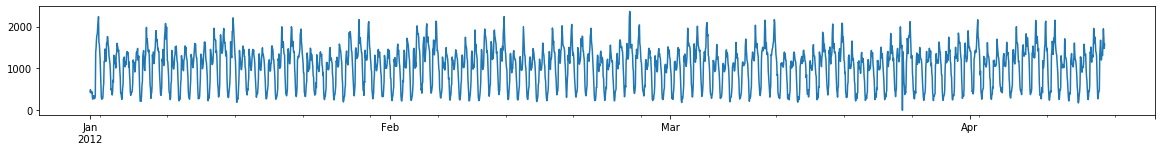

In [3]:
vals = to_pandas(test_datas[100]).iloc[:24 * 7 * 15]
vals.plot(figsize=(20, 2))

In [6]:
FOLDS = (7, 24)
NR_IN_CYCLES = 10

forecasters = [
    DFTForecaster(nr_params=50, folds=(7, 24)),
    DCTForecaster(nr_params=50, folds=(7, 24)),
    HoltWintersForecaster(folds=(7, 24)),
    CPForecaster(nr_params=2, folds=(7, 24)),
    TuckerForecaster(nr_params=2, folds=(7, 24)),
]

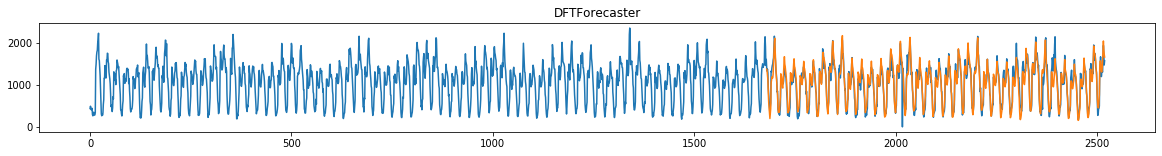

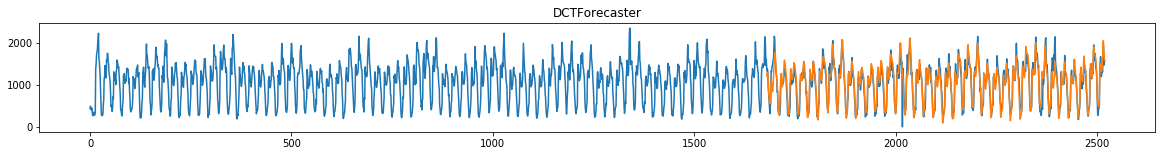

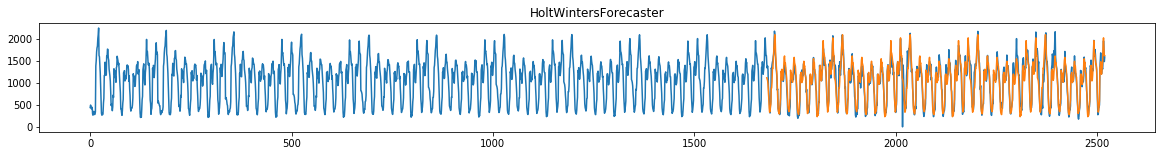

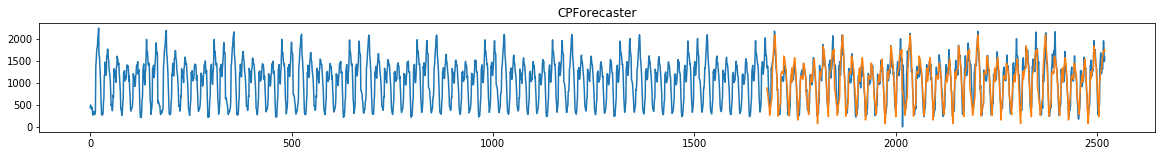

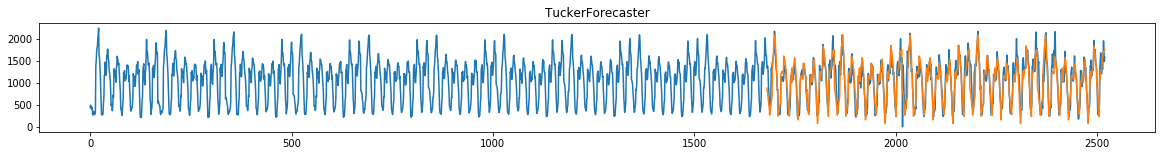

In [7]:
for fcaster in forecasters:
    result = fcaster(vals, nr_in_cycles=10)
    f, ax = plt.subplots(figsize=(20, 2))
    ax.plot(vals.values)
    ax.plot(np.r_[
        [np.nan] * len(result.in_sample_approx), result.forecast.values
    ])
    ax.set(title=fcaster.__class__.__name__)

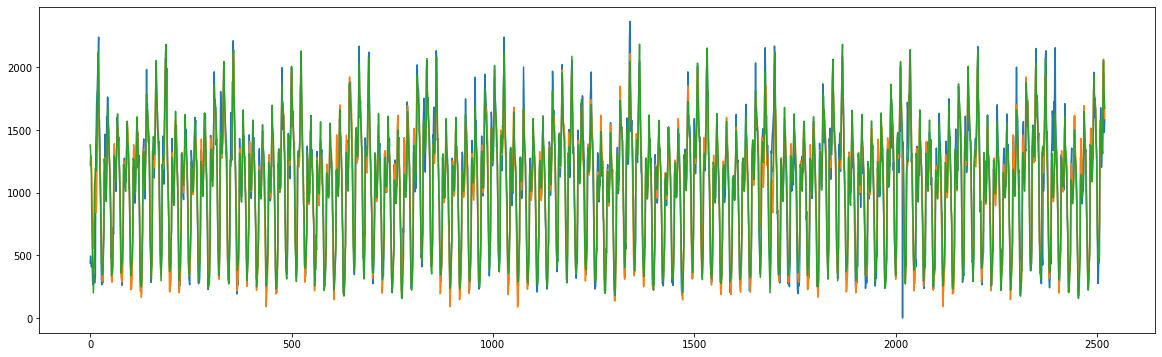

In [18]:
plt.figure(figsize=(20, 6))
plt.plot(vals.values)
plt.plot(np.r_[dct_result.in_sample_approx.values, dct_result.forecast.values])
plt.plot(np.r_[dft_result.in_sample_approx.values, dft_result.forecast.values])